In [ ]:
import pandas as pd
import csv
import numpy as np
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
driveDir = "/content/drive/MyDrive/covid-project/"

mons = ['Mar', 'Apr', 'May', 'Jun', 'Jul'] 
# mons = ['Apr']
 
def getDays(mon):
  if mon == 'Mar' or mon == 'May' or mon == 'Jul' or mon == 'Aug':
    return 31
  return 30
 
def getMonNo(mon):
  if mon == 'Mar':
    return 3
  elif mon == 'Apr':
    return 4
  elif mon == 'May':
    return 5
  elif mon == 'Jun':
    return 6
  elif mon == 'Jul':
    return 7
  elif mon == 'Aug':
    return 8  

 
#this method counts the number of tweets per day with more than 3 stigmatizing tweets in it
def getHateTweetFrequencyByMon(mon):
  num_hate_tweets = []
  for d in range(1,last+1):
    d_str = ''
    if d < 10:
      d_str += '0'
    d_str += str(d)
    
    df = pd.read_csv(driveDir + "keyword_based_dataset_no_dup/" + mon + "/" + mon + " " + d_str + ".csv", encoding='utf-8')
    num_hate_tweets.append((df[df['score']>3].shape[0]))
  return num_hate_tweets

In [ ]:
pip install ruptures

     |████████████████████████████████| 921kB 3.9MB/s 


In [ ]:
import ruptures as rpt
import matplotlib.pyplot as plt

pens = [10, 5, 1, 0.5, 0.1, 0.005, 0.001]
#pens = [0.5]
model="rbf"
saveDir = driveDir + "results/"
res=[]

#Changepoint detection with the Pelt search method
def changePoint(points, mon):
  algo = rpt.Pelt(model=model,jump=1).fit(points) # jump=5,2,1
  dir = saveDir + mon + "/"
  if not os.path.isdir(dir):
    os.makedirs(dir)
  for pen in pens:
    result = algo.predict(pen=pen)
    res.append(result)
    rpt.display(points, result, figsize=(10, 5))
    plt.title('PELT: ' + mon + ", pen=" + str(pen))
    plt.show()  
    #plt.savefig(dir + 'pelt_' + str(pen) + '.png')
    #plt.close()

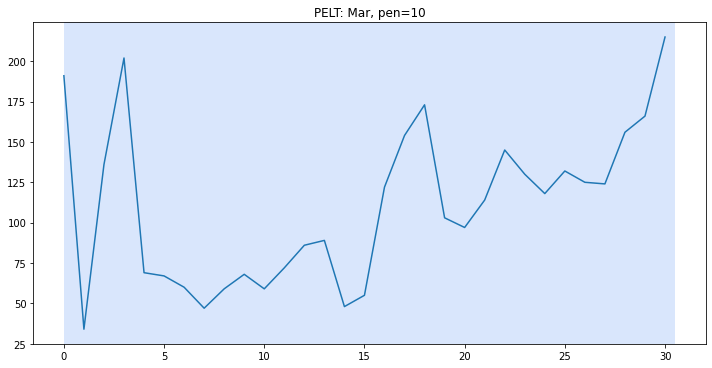

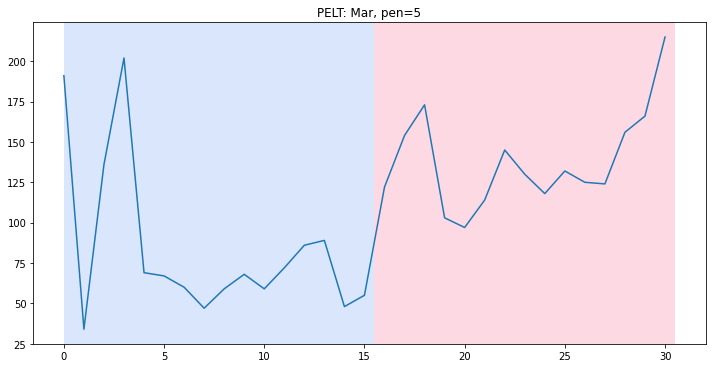

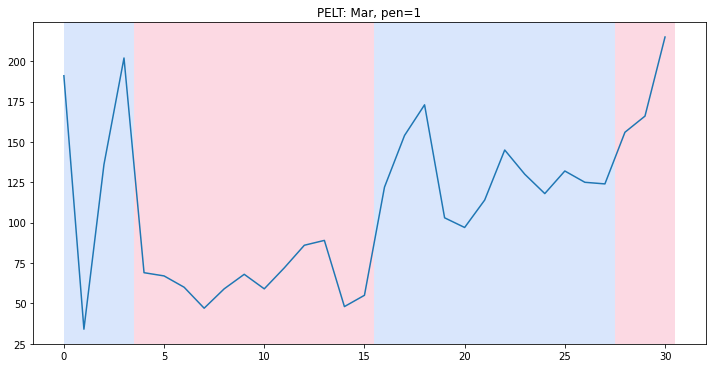

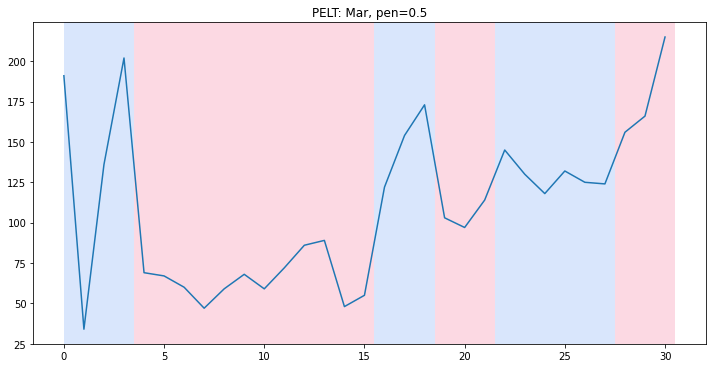

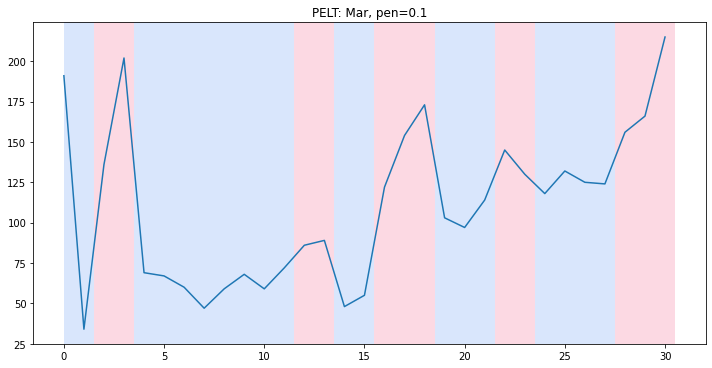

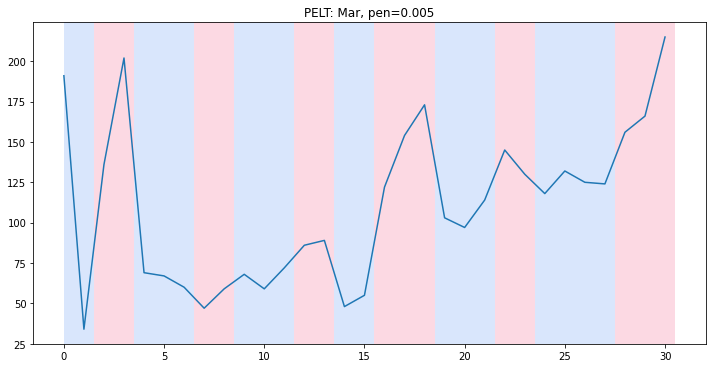

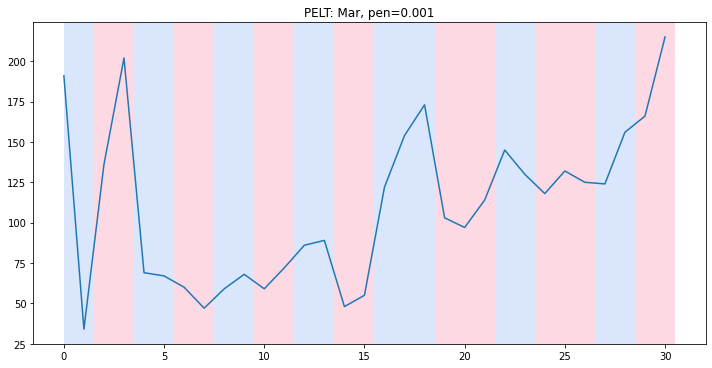

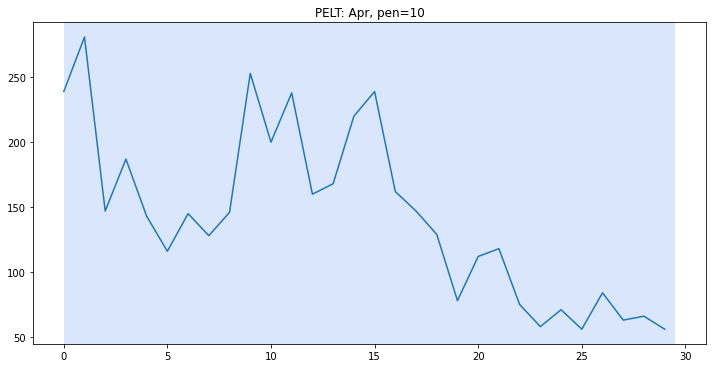

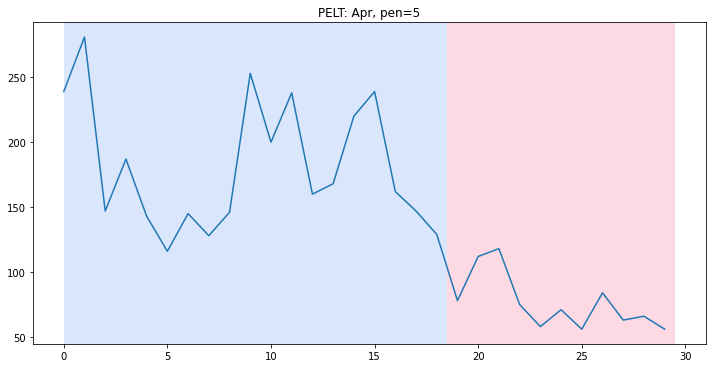

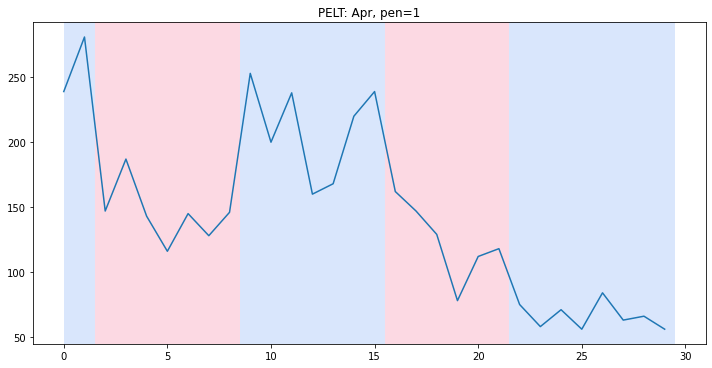

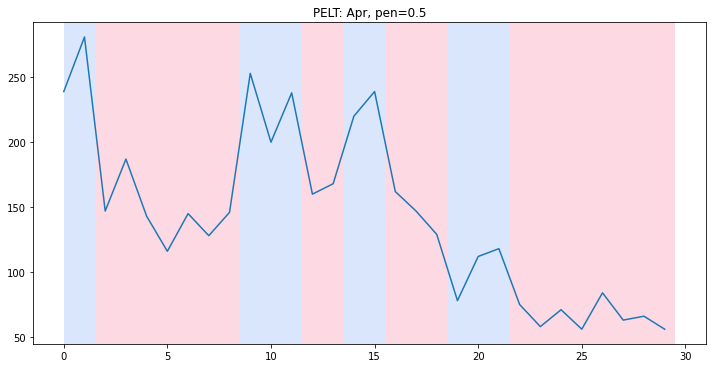

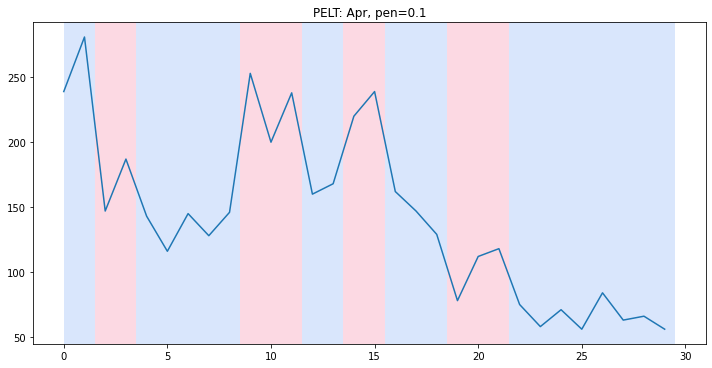

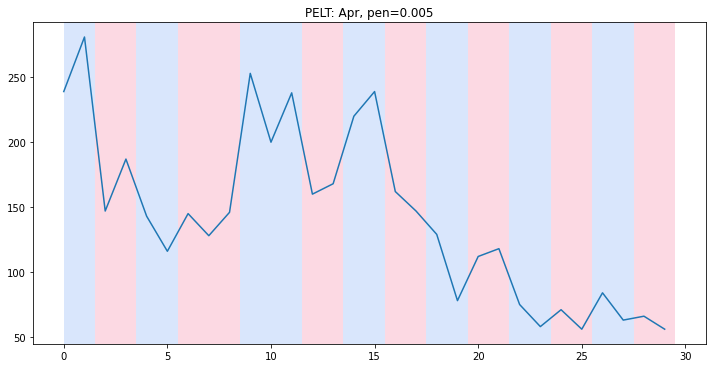

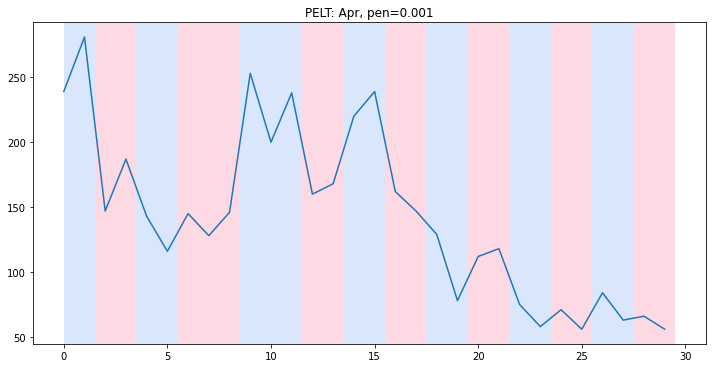

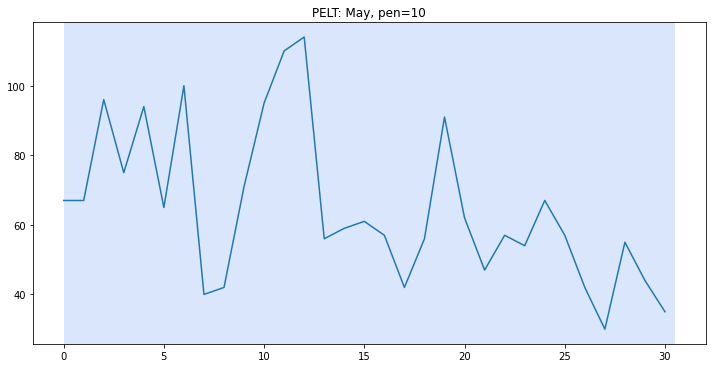

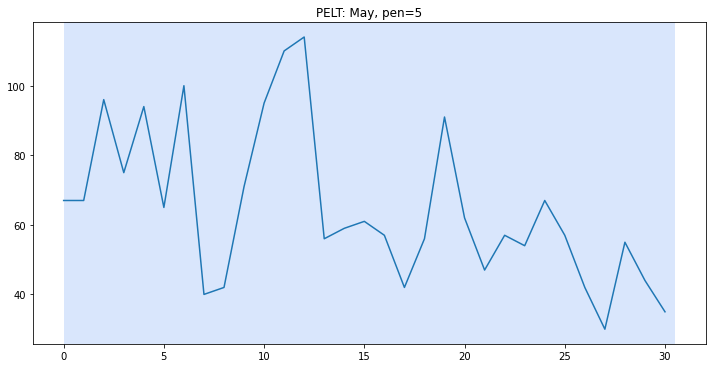

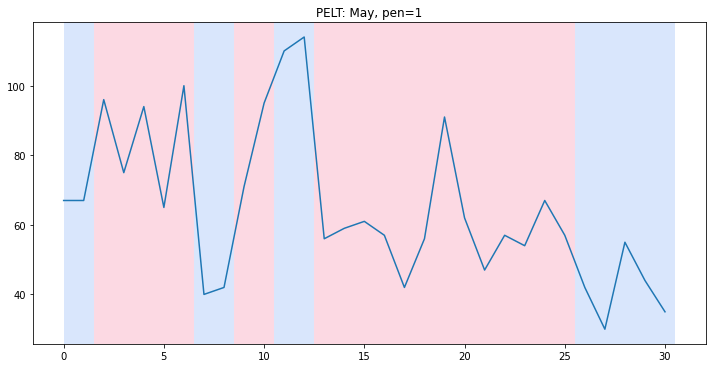

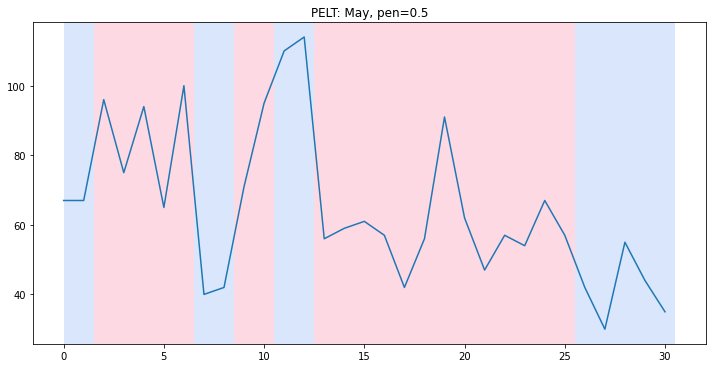

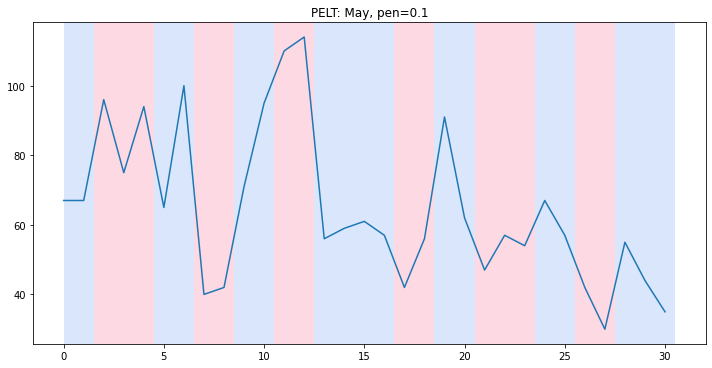

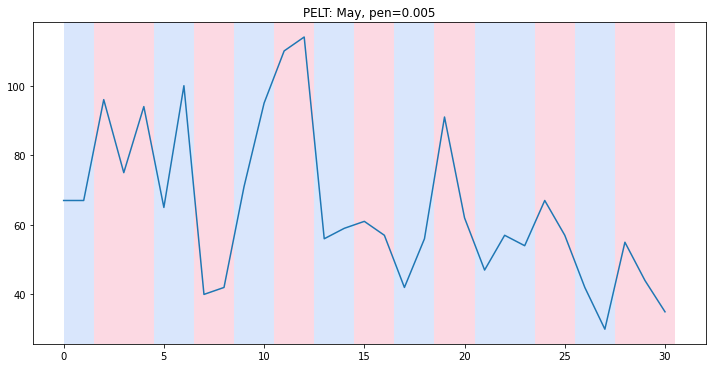

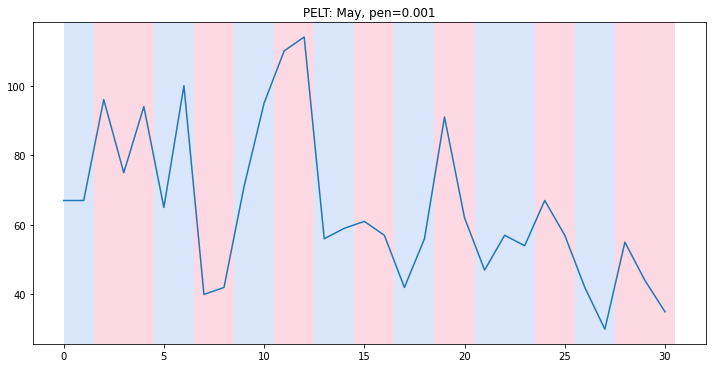

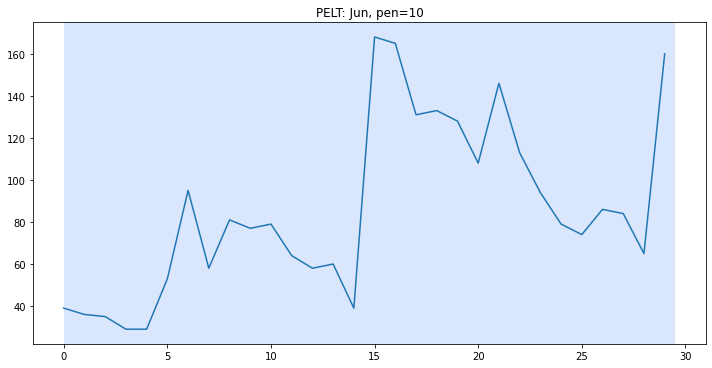

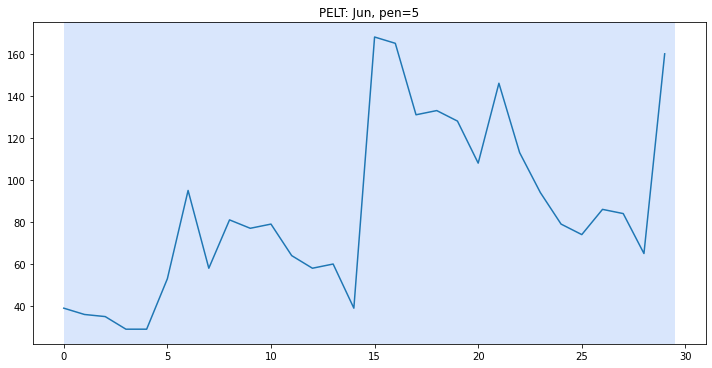

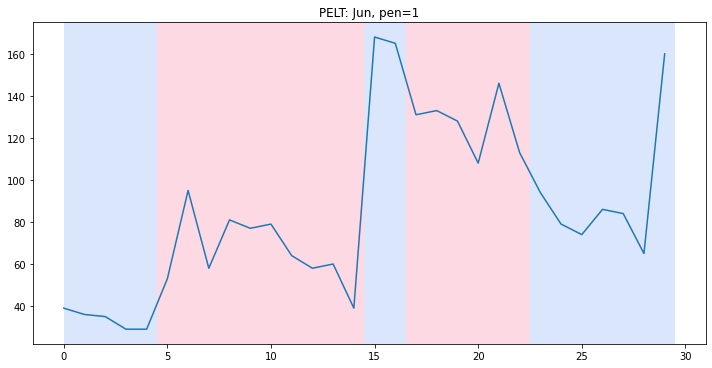

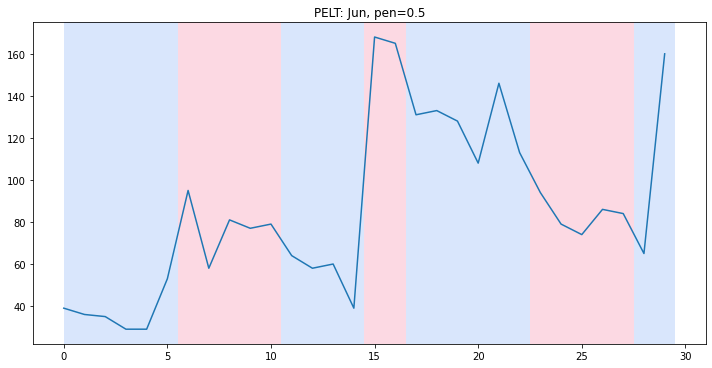

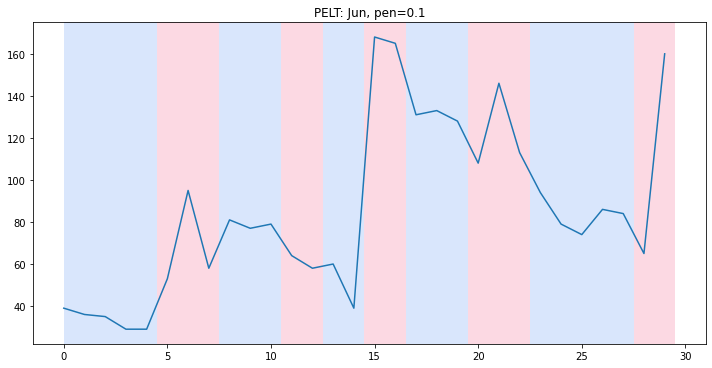

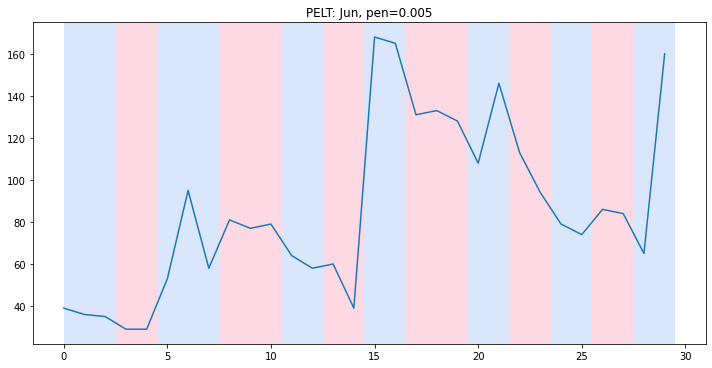

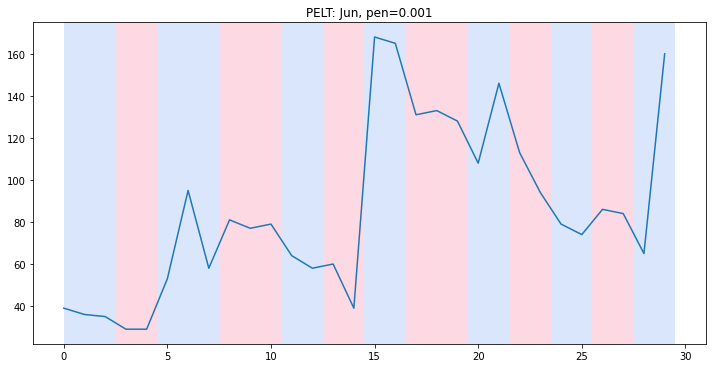

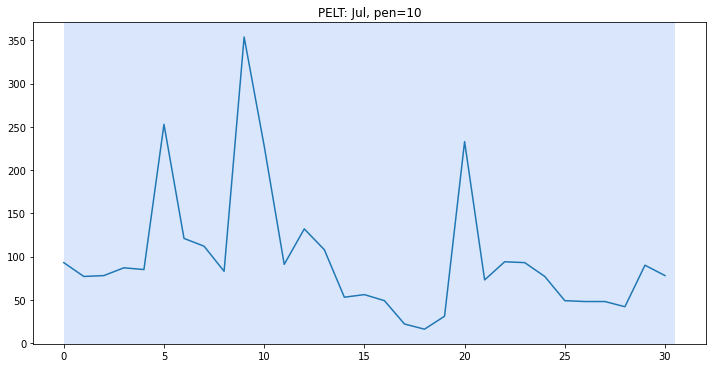

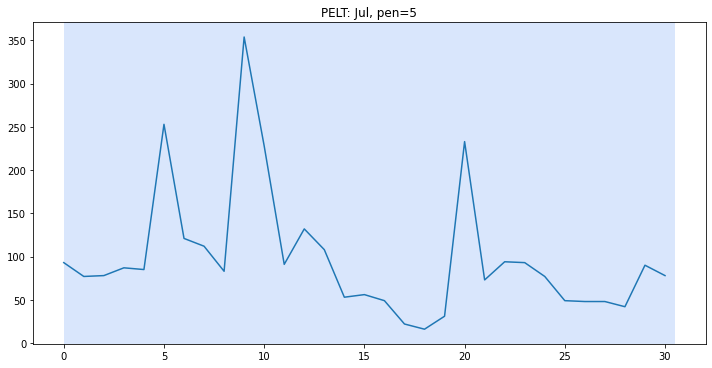

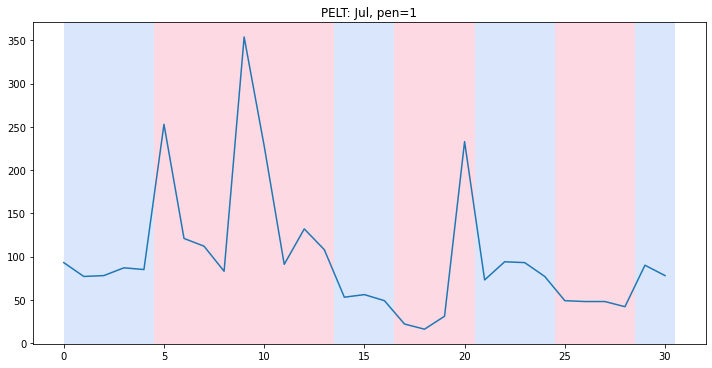

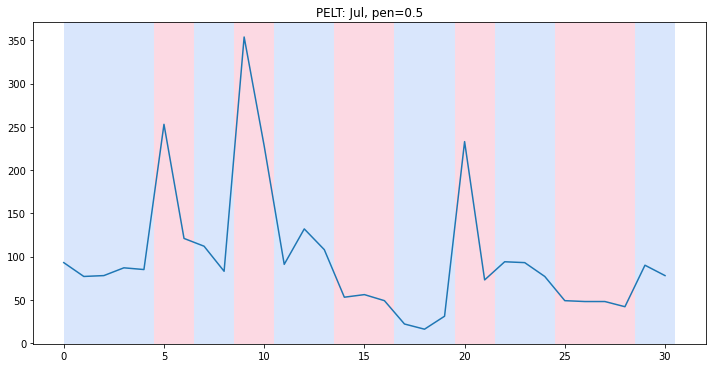

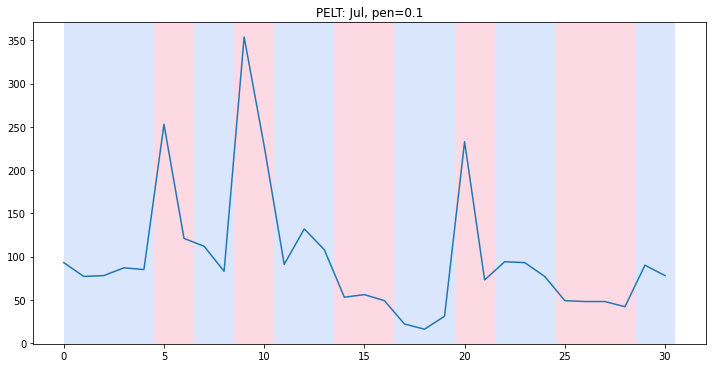

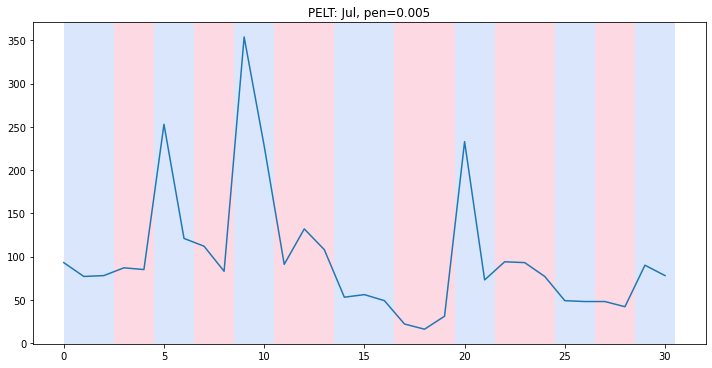

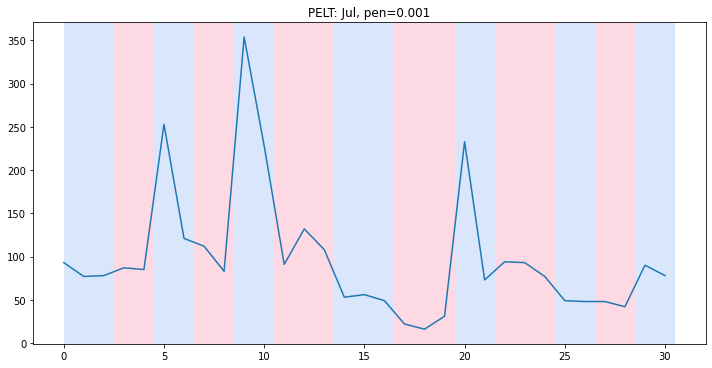

In [ ]:
for mon in mons:
  last = getDays(mon)
  num_hate_tweets = []
  frequency_list = getHateTweetFrequencyByMon(mon)
  mon_no = getMonNo(mon)
  rng = pd.date_range('2020-' + str(mon_no) + '-01', periods=last, freq='D')  
  df = pd.DataFrame({ 'Date': rng, 'Val' : frequency_list})
  df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d') #Convert the Date column into a date object
  points=np.array(df['Val'])#Convert the time series values to a numpy 1D array
  changePoint(points, mon)

In [ ]:
res

[[31],
 [16, 31],
 [4, 16, 28, 31],
 [4, 16, 19, 22, 28, 31],
 [2, 4, 12, 14, 16, 19, 22, 24, 28, 31],
 [2, 4, 7, 9, 12, 14, 16, 19, 22, 24, 28, 31],
 [2, 4, 6, 8, 10, 12, 14, 16, 19, 22, 24, 27, 29, 31],
 [30],
 [19, 30],
 [2, 9, 16, 22, 30],
 [2, 9, 12, 14, 16, 19, 22, 30],
 [2, 4, 9, 12, 14, 16, 19, 22, 30],
 [2, 4, 6, 9, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
 [2, 4, 6, 9, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
 [31],
 [31],
 [2, 7, 9, 11, 13, 26, 31],
 [2, 7, 9, 11, 13, 26, 31],
 [2, 5, 7, 9, 11, 13, 17, 19, 21, 24, 26, 28, 31],
 [2, 5, 7, 9, 11, 13, 15, 17, 19, 21, 24, 26, 28, 31],
 [2, 5, 7, 9, 11, 13, 15, 17, 19, 21, 24, 26, 28, 31],
 [30],
 [30],
 [5, 15, 17, 23, 30],
 [6, 11, 15, 17, 23, 28, 30],
 [5, 8, 11, 13, 15, 17, 20, 23, 28, 30],
 [3, 5, 8, 11, 13, 15, 17, 20, 22, 24, 26, 28, 30],
 [3, 5, 8, 11, 13, 15, 17, 20, 22, 24, 26, 28, 30],
 [31],
 [31],
 [5, 14, 17, 21, 25, 29, 31],
 [5, 7, 9, 11, 14, 17, 20, 22, 25, 29, 31],
 [5, 7, 9, 11, 14, 17, 20, 22, 25, 29, 31],
 [3